In [1]:
import pandas as pd

data = pd.read_csv(
    "sensor_data_200.txt",
    delimiter=" ",
    header=None,
    names=("date", "time", "ir", "lidar"),
)
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [2]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


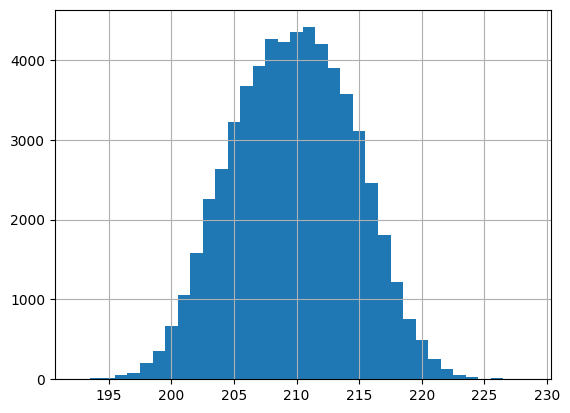

In [3]:
import matplotlib.pyplot as plt

data["lidar"].hist(bins=max(data["lidar"]) - min(data["lidar"]), align="left")
plt.show()